In [196]:
import sys
sys.path.insert(0, "../..")

In [197]:
import numpy as np
import scipy.io
from gudhi.representations.preprocessing import BirthPersistenceTransform, DiagramScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from preprocessing import *
from persistent_bow import *
from visualization import *

In [198]:
data_path = "./pd.mat"
data_mat = scipy.io.loadmat(data_path)
data = data_mat["pds"]

In [199]:
# y - labels - type of diagram [0-7]
# We transpose to iterate over diagram list
y = []
for label, diagram_list in enumerate(data.T):
    y += len(diagram_list) * [label]
y = np.array(y)

# data.T = 2d array of diagrams as row, column as type
X = data.T.reshape(-1)

pipe = make_pipeline(BirthPersistenceTransform(), 
               DiagramScaler(use=True, 
                             scalers=[
                                 ((0,), MaxAbsScaler(copy=False)),
                                 ((1,), MaxAbsScaler(copy=False))]))

preprocessed = np.array(pipe.fit_transform(X, y))

In [200]:
vectorizer = StablePersistentBow(GaussianMixture(10, random_state=42), transformator=None, scaler=None)
vectorizer.fit(preprocessed);

In [109]:
x = np.linspace(0, 1, 512)
y = np.linspace(0, 1, 512)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -vectorizer.mixture.score_samples(XX)

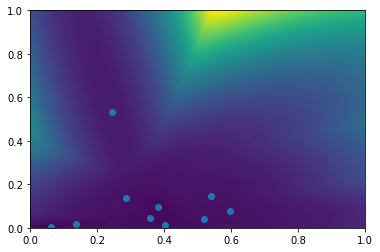

In [110]:
plt.contourf(X, Y, Z.reshape(X.shape), levels=255)
plt.scatter(mixture.means_[:, 0], mixture.means_[:, 1])

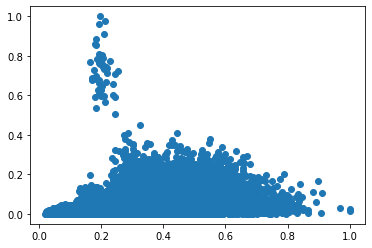

In [135]:
plt.scatter(diagram[:, 0], diagram[:, 1])

In [61]:
mixture = vectorizer.mixture

In [111]:
diagram = np.concatenate(preprocessed)

In [144]:
grid_shape = (100, 200)
print(y_points)
print(x_points)

[1.08639325e-06 1.01020855e-02 2.02030846e-02 3.03040838e-02
 4.04050829e-02 5.05060820e-02 6.06070812e-02 7.07080803e-02
 8.08090794e-02 9.09100785e-02 1.01011078e-01 1.11112077e-01
 1.21213076e-01 1.31314075e-01 1.41415074e-01 1.51516073e-01
 1.61617072e-01 1.71718072e-01 1.81819071e-01 1.91920070e-01
 2.02021069e-01 2.12122068e-01 2.22223067e-01 2.32324066e-01
 2.42425065e-01 2.52526065e-01 2.62627064e-01 2.72728063e-01
 2.82829062e-01 2.92930061e-01 3.03031060e-01 3.13132059e-01
 3.23233058e-01 3.33334058e-01 3.43435057e-01 3.53536056e-01
 3.63637055e-01 3.73738054e-01 3.83839053e-01 3.93940052e-01
 4.04041051e-01 4.14142051e-01 4.24243050e-01 4.34344049e-01
 4.44445048e-01 4.54546047e-01 4.64647046e-01 4.74748045e-01
 4.84849045e-01 4.94950044e-01 5.05051043e-01 5.15152042e-01
 5.25253041e-01 5.35354040e-01 5.45455039e-01 5.55556038e-01
 5.65657038e-01 5.75758037e-01 5.85859036e-01 5.95960035e-01
 6.06061034e-01 6.16162033e-01 6.26263032e-01 6.36364031e-01
 6.46465031e-01 6.565660

In [142]:
z = []
for grid in _grid_generator(diagram, grid_shape):
    z.append(grid)

In [193]:
def _grid_generator(X, grid_shape):
    y_points = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), grid_shape[0] + 1)
    x_points = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), grid_shape[1] + 1)
        
    for y in range(1, len(y_points)):
        
        if y == 1:
            indices = y_points[y-1] <= X[:, 1]
        else:
            indices = y_points[y-1] <  X[:, 1]
        indices &= X[:, 1] < y_points[y]
        y_split = X[indices]
                
        for x in range(1, len(x_points)):            
            if x == 1:
                indices = x_points[x-1] <= y_split[:, 0]
            else:
                indices = x_points[x-1] <  y_split[:, 0]
            indices &= y_split[:, 0] < x_points[x]
            
            yield y_split[indices]
            
#%lprun -f _grid_generator [grid for grid in _grid_generator(diagram, grid_shape)] 

In [192]:
y_points = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), grid_shape[0] + 1)
X = np.sort(diagram, 0)

np.searchsorted(X[:, 1], y_points, "right")

array([    1,  4516,  6898,  8370,  9565, 10536, 11400, 12165, 12772,
       13394, 13886, 14337, 14711, 15042, 15335, 15584, 15819, 16019,
       16178, 16304, 16420, 16506, 16570, 16641, 16692, 16755, 16787,
       16817, 16838, 16855, 16863, 16873, 16880, 16888, 16890, 16894,
       16899, 16900, 16902, 16903, 16903, 16906, 16906, 16906, 16906,
       16907, 16907, 16907, 16907, 16907, 16907, 16908, 16908, 16908,
       16909, 16909, 16909, 16910, 16910, 16910, 16914, 16916, 16916,
       16918, 16919, 16920, 16921, 16923, 16925, 16927, 16928, 16929,
       16930, 16932, 16934, 16938, 16939, 16942, 16944, 16946, 16948,
       16950, 16950, 16950, 16950, 16950, 16952, 16952, 16952, 16953,
       16953, 16953, 16954, 16954, 16954, 16954, 16955, 16955, 16956,
       16956, 16957])

In [191]:
X.shape

(16957, 2)

In [195]:
%%time
z = []
X = diagram
y_points = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), grid_shape[0] + 1)
x_points = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), grid_shape[1] + 1)

for y in range(1, len(y_points)):

    if y == 1:
        indices = y_points[y-1] <= X[:, 1]
    else:
        indices = y_points[y-1] <  X[:, 1]
    indices &= X[:, 1] < y_points[y]
    y_split = X[indices]

    for x in range(1, len(x_points)):            
        if x == 1:
            indices = x_points[x-1] <= y_split[:, 0]
        else:
            indices = x_points[x-1] <  y_split[:, 0]
        indices &= y_split[:, 0] < x_points[x]

        y_split[indices]


CPU times: user 213 ms, sys: 0 ns, total: 213 ms
Wall time: 207 ms


In [84]:
for cov_matrix in mixture.covariances_:
    eigen_val, eigen_vect = np.linalg.eigh(cov_matrix)
    
    scaled_vect = eigen_vect * eigen_val
    
    print(eigen_vect)
    print(eigen_val)
    print(np.array([[1,1],[1,1]]) * eigen_val)

[[ 0.03468532 -0.99939828]
 [-0.99939828 -0.03468532]]
[0.00037003 0.00477316]
[[0.00037003 0.00477316]
 [0.00037003 0.00477316]]
[[ 0.03276438 -0.9994631 ]
 [-0.9994631  -0.03276438]]
[1.94525635e-05 5.51430075e-04]
[[1.94525635e-05 5.51430075e-04]
 [1.94525635e-05 5.51430075e-04]]
[[-0.7727941  -0.63465682]
 [-0.63465682  0.7727941 ]]
[0.00120291 0.00203134]
[[0.00120291 0.00203134]
 [0.00120291 0.00203134]]
[[-0.10777675 -0.99417512]
 [-0.99417512  0.10777675]]
[0.00030668 0.01312574]
[[0.00030668 0.01312574]
 [0.00030668 0.01312574]]
[[-0.01773453 -0.99984273]
 [-0.99984273  0.01773453]]
[0.00012141 0.00288761]
[[0.00012141 0.00288761]
 [0.00012141 0.00288761]]
[[ 0.61642441 -0.78741409]
 [-0.78741409 -0.61642441]]
[0.00153836 0.0122351 ]
[[0.00153836 0.0122351 ]
 [0.00153836 0.0122351 ]]
[[ 0.20455477 -0.97885512]
 [-0.97885512 -0.20455477]]
[0.0034512  0.00508664]
[[0.0034512  0.00508664]
 [0.0034512  0.00508664]]
[[-0.0935471  -0.99561486]
 [-0.99561486  0.0935471 ]]
[0.00106582

In [48]:
import dlib

In [35]:
%timeit -r 2 -n 2 cluster.k_means(contiguous, 1000, n_init=1, max_iter=100)

40.9 s ± 257 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [26]:
%timeit -r 2 -n 2 cluster.k_means(contiguous, 100, n_init=1, max_iter=100)

718 ms ± 14.3 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


In [37]:
centers = cyvlfeat.kmeans.kmeans(contiguous, 1000)
cyvlfeat.kmeans.kmeans_quantize(contiguous, centers)

array([645, 477, 546, ...,  58, 289, 888], dtype=uint32)

In [60]:
np.concatenate(preprocessed)

array([[2.57330451e-01, 1.70205231e-02],
       [3.40625284e-01, 1.59591168e-03],
       [3.72394174e-01, 2.82462245e-05],
       ...,
       [3.60131998e-01, 1.69849437e-01],
       [3.18445039e-01, 2.09843918e-01],
       [2.74624488e-01, 2.83564934e-01]])

In [148]:
%load_ext line_profiler